<a href="https://colab.research.google.com/github/RickyMacharm/WorldQuant_Python/blob/master/FinalCopy_of_WQU_R_Econometrics_GroupWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Running R on Colab
In order to run R successfully on colab, we need to execute the following code `%load_ext rpy2.ipython` in a cell first of all. We need to run the cell each time we are re-starting the runtime or running thru the workbook again (especially after Google's 12 hour runtime use has elapsed.)

In [0]:
%load_ext rpy2.ipython

For every cell we next run, if the codes are R codes, we would need to remember to include `%%R` at the begining of the cell.

In [0]:
%%R
JPM <- read.csv('JPM.csv', row.names="Date") # setting the "Date" column as index


tail(JPM)

            Open  High   Low Close Adj.Close   Volume
2018-12-20 96.61 98.28 95.69 96.45  94.27905 31825200
2018-12-21 96.68 98.43 93.69 94.17  92.05038 41313900
2018-12-24 92.89 94.22 92.14 92.14  90.06607 17009300
2018-12-26 92.69 95.96 91.11 95.96  93.80009 22542900
2018-12-27 94.82 97.15 93.55 97.04  94.85577 20304700
2018-12-28 97.95 98.32 96.44 96.83  94.65051 17963300


This next cell is going to help us to create a column and display the returns from the adjusted close.

In [0]:
%%R
JPM$Returns=c(NA,diff(log(JPM$Adj.Close)))

head(JPM)

             Open   High    Low  Close Adj.Close   Volume      Returns
2018-01-31 115.65 116.66 115.16 115.67  111.1099 13141400           NA
2018-02-01 115.77 116.99 115.48 116.87  112.2626 13800600  0.010320927
2018-02-02 116.49 116.92 114.09 114.28  109.7747 16477300 -0.022410622
2018-02-05 113.00 114.59 103.98 108.80  104.5107 30097600 -0.049140201
2018-02-06 106.85 112.48 106.61 112.11  107.6902 33114800  0.029969236
2018-02-07 111.55 114.45 111.15 112.87  108.4203 21878300  0.006756144


Volatility

In [0]:
%%R
s <- sd(JPM$Adj.Close)
s

[1] 4.56395


Average stock price

In [0]:
%%R
xbar <- mean(JPM$Adj.Close)
xbar

[1] 107.2185


### S&P 500

we will repeat for the `S&P 500` to get the returns as we did for `JPMorgan`

In [0]:
%%R
SnP500<- read.csv('^GSPC.csv', row.names="Date")

tail(SnP500)

              Open    High     Low   Close Adj.Close     Volume
2018-12-20 2496.77 2509.63 2441.18 2467.42   2467.42 5585780000
2018-12-21 2465.38 2504.41 2408.55 2416.62   2416.62 7609010000
2018-12-24 2400.56 2410.34 2351.10 2351.10   2351.10 2613930000
2018-12-26 2363.12 2467.76 2346.58 2467.70   2467.70 4233990000
2018-12-27 2442.50 2489.10 2397.94 2488.83   2488.83 4096610000
2018-12-28 2498.77 2520.27 2472.89 2485.74   2485.74 3702620000


In [0]:
%%R
SnP500$Returns=c(NA,diff(log(SnP500$Adj.Close)))

head(SnP500)

              Open    High     Low   Close Adj.Close     Volume       Returns
2018-01-31 2832.41 2839.26 2813.04 2823.81   2823.81 4261280000            NA
2018-02-01 2816.45 2835.96 2812.70 2821.98   2821.98 3938450000 -0.0006482987
2018-02-02 2808.92 2808.92 2759.97 2762.13   2762.13 4301130000 -0.0214366803
2018-02-05 2741.06 2763.39 2638.17 2648.94   2648.94 5283460000 -0.0418425412
2018-02-06 2614.78 2701.04 2593.07 2695.14   2695.14 5891660000  0.0172905737
2018-02-07 2690.95 2727.67 2681.33 2681.66   2681.66 4626570000 -0.0050141384


### Two Variable Linear Regression in R
We will use `JPMorgan` as our explained variable, y, while the `S&P500` will be our explanatory variable, X.

In [0]:
%%R
y = JPM$Returns
X = SnP500$Returns


I want to be sure that the two variables of choice are of the same length.

In [0]:
%%R
length(y)

[1] 230


In [0]:
%%R
length(X)

[1] 230


Seeing that they are of the same length, we now proceed to run the linear regression as required.

In [0]:
%%R
install.packages('urca');
library('urca')

In [0]:
#Estimate the cointegrating relationship
%%R
coin <- lm(y ~ X -1) #regression without intercept
coin$resid #obtain the residuals
summary(ur.df(coin$resid)) #ADF test of residuals

#coin


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.031944 -0.005523 -0.000760  0.004042  0.039569 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.05885    0.09844 -10.756   <2e-16 ***
z.diff.lag -0.03262    0.06643  -0.491    0.624    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009103 on 225 degrees of freedom
Multiple R-squared:  0.5478,	Adjusted R-squared:  0.5438 
F-statistic: 136.3 on 2 and 225 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.756 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



### ARMA for Housing Prices



In [0]:
%%R
library('tidyverse')
library('stats')
library('readxl')
#library(tseries)
install.packages('forecast')
library('forecast')

In [0]:
%%R
install.packages('tseries')
library('tseries')

In [0]:
%%R
df <- read.csv("CSUSHPINSA.csv")


head(df)

        DATE CSUSHPINSA
1 1988-01-01      4.842
2 1988-02-01      4.775
3 1988-03-01      4.846
4 1988-04-01      4.804
5 1988-05-01      4.848
6 1988-06-01      4.839


We want to visualize some plots. So we need some library that will assist us in this.

In [0]:
%%R
library('ggplot2')

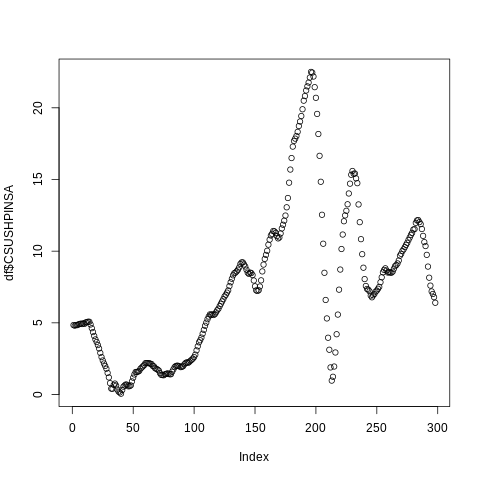

In [0]:
%%R
plot(df$CSUSHPINSA)

This is obviously not a stationary graph. We will do some differencing by calculating the Returns.

In [0]:
%%R
df$Returns=c(NA,diff(log(df$CSUSHPINSA))) # Calculate Returns

df <- na.omit(df) # Delete Null Values with row

head(df) #Visualize the data

        DATE CSUSHPINSA      Returns
2 1988-02-01      4.775 -0.013933885
3 1988-03-01      4.846  0.014759648
4 1988-04-01      4.804 -0.008704718
5 1988-05-01      4.848  0.009117345
6 1988-06-01      4.839 -0.001858161
7 1988-07-01      4.892  0.010893130


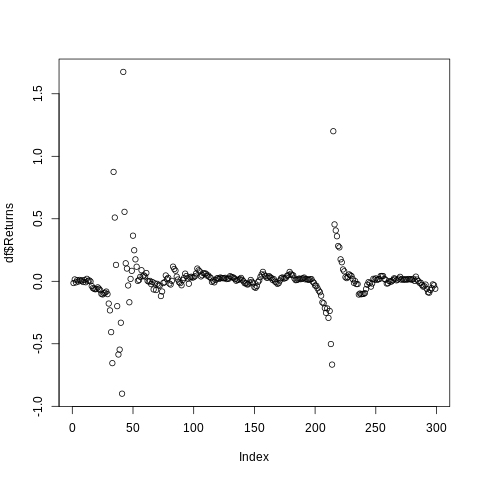

In [0]:
%%R
plot(df$Returns)

The 'Returns' are more stationary from the graph above. We will still go furhter to test.

### Augmented Dickey-Fuller Test

In [0]:
%%R
adf.test(df$Returns, alternative='stationary')


	Augmented Dickey-Fuller Test

data:  df$Returns
Dickey-Fuller = -6.0984, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



From the `p-value` of the ADF test, we are rejecting the null hypothesis and accepting the alternate hypothesis that the `Returns` is stationary. So further down the line we won't need to differentiate to make it stationary. We would use **ARMA** instead of **ARIMA**.

### Autoregressive Moving Integrated Average Model

ARIMA (p,d,q) has both the AR and MA components in the equation.

p – the order of the autoregressive model.

d – the order required to make the variable stationary.

 q– the order of the moving average model.

But in our case we would keep `d=0` at all times since we have determined that the `Returns` are stationary.


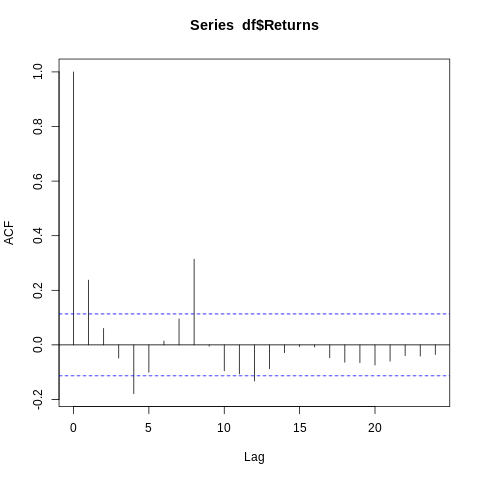

In [0]:
%%R
acf(df$Returns)

This will show us the lag term in the **AR** part of the **ARMA** model. We can see some evidence of decay after about 4 lags on 1, 4, 8, 12.

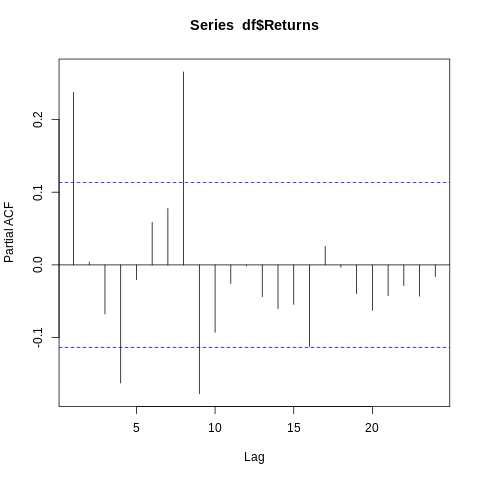

In [0]:
%%R
pacf(df$Returns)

This will show us the lag term in the **MA** part of the ARMA model. We can see some evidence of decay after about 4 lags on 1, 4, 8, 9.

The two models actally look alike. Selecting the best lag to use is really an art rather than a science. 10 different folks would have 10 different choices.
We would now choose a new functionality in R that will help us with that choice.

In [0]:
%%R
auto.arima(df$Returns)

Series: df$Returns 
ARIMA(2,0,2) with zero mean 

Coefficients:
        ar1      ar2      ma1     ma2
      1.093  -0.8270  -0.9059  0.7767
s.e.  0.121   0.0641   0.1161  0.0689

sigma^2 estimated as 0.0312:  log likelihood=95.88
AIC=-181.77   AICc=-181.56   BIC=-163.26


Now that we have found the lag terms, we will fit the ARIMA model.

In [0]:
%%R
fit=arima(df$Returns, order=c(2,0,2))

We will now find the residuals and also do a test on those residual.

In [0]:
%%R
fit_resid=residuals(fit)

In [0]:
%%R
Box.test(fit_resid, lag=10, type = 'Ljung-Box')


	Box-Ljung test

data:  fit_resid
X-squared = 25.655, df = 10, p-value = 0.004233



### Forcast Using the ARIMA Model

In [0]:
%%R
my_forecast = forecast(fit, h=20)
my_forecast

    Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
300  -5.537717e-03 -0.2302625 0.2191871 -0.3492247 0.3381492
301  -5.465227e-03 -0.2340788 0.2231484 -0.3550996 0.3441691
302   3.796462e-03 -0.2273872 0.2349801 -0.3497684 0.3573613
303   1.387574e-02 -0.2173256 0.2450771 -0.3397162 0.3674677
304   1.724059e-02 -0.2153443 0.2498255 -0.3384673 0.3729485
305   1.257772e-02 -0.2219471 0.2471026 -0.3460971 0.3712526
306   4.686614e-03 -0.2301440 0.2395172 -0.3544558 0.3638290
307  -9.096031e-05 -0.2352185 0.2350366 -0.3596876 0.3595056
308   1.213307e-03 -0.2350222 0.2374489 -0.3600778 0.3625044
309   6.597430e-03 -0.2301289 0.2433238 -0.3554442 0.3686391
310   1.141169e-02 -0.2253253 0.2481487 -0.3506463 0.3734696
311   1.222359e-02 -0.2249928 0.2494400 -0.3505676 0.3750148
312   9.125786e-03 -0.2285422 0.2467938 -0.3543560 0.3726076
313   5.062109e-03 -0.2326323 0.2427566 -0.3584602 0.3685844
314   3.178632e-03 -0.2346587 0.2410159 -0.3605621 0.3669194
315   4.481775e-03 -0.23

In [0]:
%%R
accuracy(my_forecast)

                       ME      RMSE        MAE      MPE     MAPE     MASE
Training set 7.507773e-06 0.1753537 0.06856249 68.01339 144.7124 1.171914
                   ACF1
Training set 0.00804834


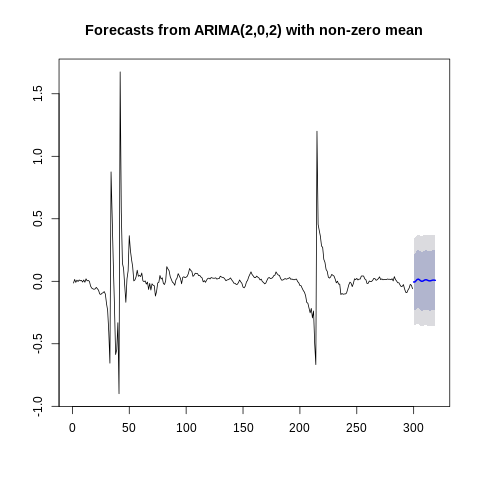

In [0]:
%%R
plot(my_forecast)

### Suggested Exogenous Variables

1. Location of the property

2. Age of the property

3. Acreage (area) of the property

4. Economic growth of the city

5. proximity to public transport


## Comments

The following students did not contribute to this group work.

### 1. Kevin Larry Fotso Fono
### 2. Sopulu Obi
### 3. Matheus Pavarini Schimidt